In [1]:
%reload_ext autotime
import pandas as pd
import requests
import geopandas as gpd
from tqdm.auto import tqdm
from tqdm.contrib.concurrent import process_map
import time
import os
from glob import glob
from coastsat import SDS_transects
import json
import matplotlib.pyplot as plt
import dotenv
dotenv.load_dotenv()

True

In [2]:
transects = gpd.read_file("transects_extended.geojson")
transects

id  site_id  orientation  along_dist  along_dist_norm  \
0       aus0001-0000  aus0001   104.347648    0.000000         0.000000   
1       aus0001-0001  aus0001    93.495734   98.408334         0.002935   
2       aus0001-0002  aus0001    82.069341  198.408334         0.005918   
3       aus0001-0003  aus0001    81.192757  298.402523         0.008900   
4       aus0001-0004  aus0001    81.065473  398.402523         0.011882   
...              ...      ...          ...         ...              ...   
147486  nzd0580-0005  nzd0580          NaN         NaN              NaN   
147487  nzd0580-0006  nzd0580          NaN         NaN              NaN   
147488  nzd0580-0007  nzd0580          NaN         NaN              NaN   
147489  nzd0580-0008  nzd0580          NaN         NaN              NaN   
147490  nzd0580-0009  nzd0580          NaN         NaN              NaN   

        beach_slope     cil     ciu     trend  n_points  n_points_nonan  \
0             0.085  0.0545  0.2000 -1.441081     767.0           428.0   
1             0.050  0.0387  0.0640 -1.037105     767.0           569.0   
2             0.050  0.0428  0.0647 -0.680019     767.0           588.0   
3             0.055  0.0480  0.0659 -0.405198     767.0           598.0   
4             0.075  0.0614  0.0922 -0.090025     767.0           608.0   
...             ...     ...     ...       ...       ...             ...   
147486          NaN     NaN     NaN       NaN       NaN             NaN   
147487          NaN     NaN     NaN       NaN       NaN             NaN   
147488          NaN     NaN     NaN       NaN       NaN             NaN   
147489          NaN     NaN     NaN       NaN       NaN             NaN   
147490          NaN     NaN     NaN       NaN       NaN             NaN   

        r2_score        mae          mse       rmse   intercept ERODIBILITY  \
0       0.168420  28.102591  1263.560863  35.546601  179.085729        None   
1       0.097874  25.419324  1033.770813  32.152306  212.247788        None   
2       0.053927  22.632907   838.007507  28.948359  205.106151        None   
3       0.023412  20.749758   698.653187  26.432048  191.745881        None   
4       0.001277  19.889328   655.810616  25.608800  175.092121        None   
...          ...        ...          ...        ...         ...         ...   
147486       NaN        NaN          NaN        NaN         NaN        None   
147487       NaN        NaN          NaN        NaN         NaN        None   
147488       NaN        NaN          NaN        NaN         NaN        None   
147489       NaN        NaN          NaN        NaN         NaN        None   
147490       NaN        NaN          NaN        NaN         NaN        None   

                                                 geometry  
0       LINESTRING (153.26555 -24.7007, 153.26938 -24....  
1       LINESTRING (153.26525 -24.7019, 153.2692 -24.7...  
2       LINESTRING (153.26539 -24.70316, 153.26931 -24...  
3       LINESTRING (153.26555 -24.70408, 153.26945 -24...  
4       LINESTRING (153.2657 -24.70497, 153.26961 -24....  
...                                                   ...  
147486  LINESTRING (172.69317 -43.62862, 172.69259 -43...  
147487  LINESTRING (172.69079 -43.6289, 172.69309 -43....  
147488  LINESTRING (172.68991 -43.62923, 172.69221 -43...  
147489  LINESTRING (172.6883 -43.63166, 172.69319 -43....  
147490  LINESTRING (172.68847 -43.63237, 172.69336 -43...  

[147491 rows x 18 columns]

In [3]:
transects_edit = gpd.read_file("https://zenodo.org/records/15614554/files/transects_edit.geojson?download=1")
transects_edit

IOStream.flush timed out


site_id  orientation  along_dist  along_dist_norm  beach_slope  \
0       aus0001   104.347648    0.000000         0.000000        0.085   
1       aus0001    93.495734   98.408334         0.002935        0.050   
2       aus0001    82.069341  198.408334         0.005918        0.050   
3       aus0001    81.192757  298.402523         0.008900        0.055   
4       aus0001    81.065473  398.402523         0.011882        0.075   
...         ...          ...         ...              ...          ...   
118181  nzd0561   141.008990  499.608316         0.555889        0.085   
118182  nzd0561   135.129214  599.517710         0.667053        0.090   
118183  nzd0561   127.431653  698.799788         0.777520        0.080   
118184  nzd0561   121.785300  798.799788         0.888785        0.070   
118185  nzd0561   119.794640  898.755204         1.000000        0.055   

           cil     ciu     trend  n_points  n_points_nonan            id  \
0       0.0545  0.2000 -1.892087     654.0           342.0  aus0001-0000   
1       0.0387  0.0640 -1.205575     654.0           473.0  aus0001-0001   
2       0.0428  0.0647 -0.698779     654.0           491.0  aus0001-0002   
3       0.0480  0.0659 -0.303470     654.0           502.0  aus0001-0003   
4       0.0614  0.0922 -0.105642     654.0           508.0  aus0001-0004   
...        ...     ...       ...       ...             ...           ...   
118181  0.0759  0.1026 -0.145145     411.0           290.0  nzd0561-0005   
118182  0.0775  0.1055 -0.347302     411.0           267.0  nzd0561-0006   
118183  0.0715  0.0931 -0.013795     411.0           257.0  nzd0561-0007   
118184  0.0640  0.0812  0.108902     411.0           292.0  nzd0561-0008   
118185  0.0493  0.0604  0.112175     411.0           284.0  nzd0561-0009   

                                                 geometry  
0       LINESTRING (153.26555 -24.7007, 153.26938 -24....  
1       LINESTRING (153.26525 -24.7019, 153.2692 -24.7...  
2       LINESTRING (153.26539 -24.70316, 153.26931 -24...  
3       LINESTRING (153.26555 -24.70408, 153.26945 -24...  
4       LINESTRING (153.2657 -24.70497, 153.26961 -24....  
...                                                   ...  
118181  LINESTRING (168.52498 -46.77668, 168.52724 -46...  
118182  LINESTRING (168.52416 -46.77717, 168.5267 -46....  
118183  LINESTRING (168.52342 -46.77775, 168.52627 -46...  
118184  LINESTRING (168.52282 -46.77836, 168.52587 -46...  
118185  LINESTRING (168.52234 -46.77893, 168.52546 -46...  

[118186 rows x 12 columns]

In [4]:
transects.loc[~(transects.id.isin(transects_edit.id.tolist()) | transects.along_dist.isna()), "ERODIBILITY"] = "Hidden"
transects["ERODIBILITY"].value_counts()

ERODIBILITY
Low       11046
Hidden     9208
High       6651
Medium     1608
Non         458
Name: count, dtype: int64

In [5]:
transects.to_file("transects_extended.geojson", driver="GeoJSON")

In [6]:
poly = gpd.read_file("polygons.geojson")
poly = poly[poly.id.str.startswith("nzd")]
poly.set_index("id", inplace=True)
poly

area id_sorted      northing  \
id                                              
nzd0001  3.069093e+06   nzd0001 -4.085604e+06   
nzd0002  1.507931e+06   nzd0002 -4.086100e+06   
nzd0003  2.484730e+06   nzd0003 -4.087232e+06   
nzd0006  9.619509e+05   nzd0004 -4.090732e+06   
nzd0007  3.109433e+06   nzd0005 -4.095516e+06   
...               ...       ...           ...   
nzd0576           NaN      None           NaN   
nzd0577           NaN      None           NaN   
nzd0578           NaN      None           NaN   
nzd0579           NaN      None           NaN   
nzd0580           NaN      None           NaN   

                                                  geometry  
id                                                          
nzd0001  POLYGON ((172.96406 -34.43054, 172.99324 -34.4...  
nzd0002  POLYGON ((172.93456 -34.42857, 172.95856 -34.4...  
nzd0003  POLYGON ((173.0098 -34.42055, 173.00088 -34.44...  
nzd0006  POLYGON ((173.00532 -34.46694, 173.00612 -34.4...  
nzd0007  POLYGON ((172.99847 -34.48102, 173.00081 -34.5...  
...                                                    ...  
nzd0576  POLYGON ((173.01937 -41.02342, 173.02132 -41.0...  
nzd0577  POLYGON ((173.01823 -41.03887, 173.02131 -41.0...  
nzd0578  POLYGON ((173.02309 -41.03058, 173.0216 -41.03...  
nzd0579  POLYGON ((173.05115 -40.94385, 173.05051 -40.9...  
nzd0580  POLYGON ((172.69804 -43.63239, 172.68976 -43.6...  

[579 rows x 4 columns]

1999-08-17 22:10:00+00:00 POINT (172.97690966086745 -34.42150701355086)


<Axes: xlabel='time'>

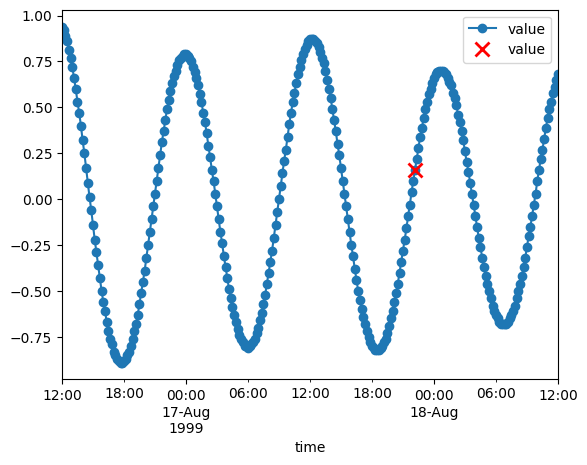

In [7]:
sitename = "nzd0001"
dates = pd.to_datetime(pd.read_csv(f"data/{sitename}/transect_time_series.csv").dates).dt.round("10min")
point = poly.geometry[sitename].centroid
datetime = dates.iloc[0]
print(datetime, point)
r = requests.get("https://api.niwa.co.nz/tides/data", params={
    "lat": point.y,
    "long": point.x,
    "numberOfDays": 2,
    "startDate": str(datetime.date()),
    "datum": "MSL",
    "interval": 10, # 10 minute resolution
    "apikey": os.environ["NIWA_API_KEY"]
}, timeout=(30,30))
df = pd.DataFrame(r.json()["values"])
df.index = pd.to_datetime(df.time)
ax = df.plot(style="o-")
df[df.index == datetime].plot(color="red", style="x", ax=ax, mew=2, ms=10)

In [8]:
datetime, datetime.tz_convert("Pacific/Auckland")

(Timestamp('1999-08-17 22:10:00+0000', tz='UTC'),
 Timestamp('1999-08-18 10:10:00+1200', tz='Pacific/Auckland'))

When I asked for 1 day (1999-08-17), I got 1999-08-16 12:00 - 1999-08-17 12:00. Have to request 2 days, then pull out the one datetime I want

In [9]:
files = pd.DataFrame({"filename": sorted(glob("data/nzd*/transect_time_series.csv"))})
files["sitename"] = files.filename.str.split("/").str[1]
files["have_tides"] = files.sitename.apply(lambda s: os.path.isfile(f"data/{s}/tides.csv"))
files

filename sitename  have_tides
0    data/nzd0001/transect_time_series.csv  nzd0001        True
1    data/nzd0002/transect_time_series.csv  nzd0002        True
2    data/nzd0003/transect_time_series.csv  nzd0003        True
3    data/nzd0004/transect_time_series.csv  nzd0004        True
4    data/nzd0005/transect_time_series.csv  nzd0005        True
..                                     ...      ...         ...
574  data/nzd0576/transect_time_series.csv  nzd0576        True
575  data/nzd0577/transect_time_series.csv  nzd0577        True
576  data/nzd0578/transect_time_series.csv  nzd0578        True
577  data/nzd0579/transect_time_series.csv  nzd0579        True
578  data/nzd0580/transect_time_series.csv  nzd0580       False

[579 rows x 3 columns]

In [10]:
def get_tide_for_dt(point, datetime):
    while True:
        try:
            r = requests.get("https://api.niwa.co.nz/tides/data", params={
                "lat": point.y,
                "long": point.x,
                "numberOfDays": 2,
                "startDate": str(datetime.date()),
                "datum": "MSL",
                "interval": 10, # 10 minute resolution
                "apikey": os.environ["NIWA_API_KEY"]
            }, timeout=(30,30))
        except Exception as e:
            print(e)
            time.sleep(5)
            continue
        if r.status_code == 200:
            df = pd.DataFrame(r.json()["values"])
            df.index = pd.to_datetime(df.time)
            return df.value[datetime]
        elif r.status_code == 429:
            sleep_seconds = 30
            # sleep for x seconds to refresh the count
            print(f'Num of API reqs exceeded, Sleeping for: {sleep_seconds} seconds...')
            time.sleep(sleep_seconds)

for sitename in tqdm(files[~files.have_tides].sitename):
    dates = pd.to_datetime(pd.read_csv(f"data/{sitename}/transect_time_series.csv").dates).dt.round("10min")
    point = poly.geometry[sitename].centroid

    results = []
    for date in tqdm(dates):
        result = get_tide_for_dt(point, date)
        results.append({
            "dates": date,
            "tide": result
        })
    df = pd.DataFrame(results)
    df.set_index("dates", inplace=True)
    df.to_csv(f"data/{sitename}/tides.csv")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/732 [00:00<?, ?it/s]

In [11]:
files["have_tides"] = files.sitename.apply(lambda s: os.path.isfile(f"data/{s}/tides.csv"))

In [12]:
# Transects, origin is landward. Has beach_slope
transects = gpd.read_file("transects_extended.geojson").to_crs(2193).drop_duplicates(subset="id")
transects.set_index("id", inplace=True)
transects

site_id  orientation  along_dist  along_dist_norm  beach_slope  \
id                                                                             
aus0001-0000  aus0001   104.347648    0.000000         0.000000        0.085   
aus0001-0001  aus0001    93.495734   98.408334         0.002935        0.050   
aus0001-0002  aus0001    82.069341  198.408334         0.005918        0.050   
aus0001-0003  aus0001    81.192757  298.402523         0.008900        0.055   
aus0001-0004  aus0001    81.065473  398.402523         0.011882        0.075   
...               ...          ...         ...              ...          ...   
nzd0580-0005  nzd0580          NaN         NaN              NaN          NaN   
nzd0580-0006  nzd0580          NaN         NaN              NaN          NaN   
nzd0580-0007  nzd0580          NaN         NaN              NaN          NaN   
nzd0580-0008  nzd0580          NaN         NaN              NaN          NaN   
nzd0580-0009  nzd0580          NaN         NaN              NaN          NaN   

                 cil     ciu     trend  n_points  n_points_nonan  r2_score  \
id                                                                           
aus0001-0000  0.0545  0.2000 -1.441081     767.0           428.0  0.168420   
aus0001-0001  0.0387  0.0640 -1.037105     767.0           569.0  0.097874   
aus0001-0002  0.0428  0.0647 -0.680019     767.0           588.0  0.053927   
aus0001-0003  0.0480  0.0659 -0.405198     767.0           598.0  0.023412   
aus0001-0004  0.0614  0.0922 -0.090025     767.0           608.0  0.001277   
...              ...     ...       ...       ...             ...       ...   
nzd0580-0005     NaN     NaN       NaN       NaN             NaN       NaN   
nzd0580-0006     NaN     NaN       NaN       NaN             NaN       NaN   
nzd0580-0007     NaN     NaN       NaN       NaN             NaN       NaN   
nzd0580-0008     NaN     NaN       NaN       NaN             NaN       NaN   
nzd0580-0009     NaN     NaN       NaN       NaN             NaN       NaN   

                    mae          mse       rmse   intercept ERODIBILITY  \
id                                                                        
aus0001-0000  28.102591  1263.560863  35.546601  179.085729        None   
aus0001-0001  25.419324  1033.770813  32.152306  212.247788        None   
aus0001-0002  22.632907   838.007507  28.948359  205.106151        None   
aus0001-0003  20.749758   698.653187  26.432048  191.745881        None   
aus0001-0004  19.889328   655.810616  25.608800  175.092121        None   
...                 ...          ...        ...         ...         ...   
nzd0580-0005        NaN          NaN        NaN         NaN        None   
nzd0580-0006        NaN          NaN        NaN         NaN        None   
nzd0580-0007        NaN          NaN        NaN         NaN        None   
nzd0580-0008        NaN          NaN        NaN         NaN        None   
nzd0580-0009        NaN          NaN        NaN         NaN        None   

                                                       geometry  
id                                                               
aus0001-0000  LINESTRING (-422245.836 7118667.88, -421827.54...  
aus0001-0001  LINESTRING (-422256.313 7118525.222, -421837.6...  
aus0001-0002  LINESTRING (-422219.773 7118383.012, -421816.8...  
aus0001-0003  LINESTRING (-422187.543 7118279.615, -421786.5...  
aus0001-0004  LINESTRING (-422155.665 7118178.983, -421754.9...  
...                                                         ...  
nzd0580-0005  LINESTRING (1575247.391 5169328.227, 1575202.3...  
nzd0580-0006  LINESTRING (1575055.33 5169296.88, 1575242.365...  
nzd0580-0007  LINESTRING (1574984.641 5169259.468, 1575171.6...  
nzd0580-0008  LINESTRING (1574855.793 5168989.166, 1575250.0...  
nzd0580-0009  LINESTRING (1574869.262 5168910.308, 1575263.5...  

[147491 rows x 17 columns]

In [13]:
def despike(chainage, threshold=40):
    chainage = chainage.dropna()
    chainage, dates = SDS_transects.identify_outliers(chainage.tolist(), chainage.index.tolist(), threshold)
    return pd.Series(chainage, index=dates)

def process_sitename(sitename):
    transects_at_site = transects[transects.site_id == sitename]
    assert len(transects_at_site)
    raw_intersects = pd.read_csv(f"data/{sitename}/transect_time_series.csv")#.drop(columns=["Unnamed: 0"])
    sat_times = pd.to_datetime(raw_intersects.dates).dt.round("10min")
    raw_intersects.set_index("dates", inplace=True)
    raw_intersects.index = pd.to_datetime(raw_intersects.index)
    tides = pd.read_csv(f"data/{sitename}/tides.csv")
    tides.set_index("dates", inplace=True)
    tides.index = pd.to_datetime(tides.index)
    tides = tides[tides.index.isin(sat_times)]
    if not all(sat_times.isin(tides.index)):
        dates = sat_times[~sat_times.isin(tides.index)]
        print(f"Fetching missing tides for {len(dates)} dates at {sitename}")
        point = poly.geometry[sitename].centroid
        results = []
        for date in tqdm(dates):
            result = get_tide_for_dt(point, date)
            results.append({
                "dates": date,
                "tide": result
            })
        new_tides = pd.DataFrame(results)
        new_tides.dates = pd.to_datetime(new_tides.dates)
        new_tides.set_index("dates", inplace=True)
        tides = pd.concat([tides, new_tides])
        tides.sort_index(inplace=True)
        tides.to_csv(f"data/{sitename}/tides.csv")
    corrections = tides.tide.apply(lambda tide: tide / transects_at_site.beach_slope.interpolate().bfill().ffill()).set_index(raw_intersects.index)
    corrections.columns = corrections.columns.astype(str)
    tidally_corrected = raw_intersects + corrections
    tidally_corrected = tidally_corrected.drop(columns="satname").apply(despike, axis=0)
    tidally_corrected.index.name = "dates"
    if len(tidally_corrected) == 0:
        print(f"Despike removed all points for {sitename}")
    tidally_corrected["satname"] = raw_intersects.satname
    tidally_corrected.to_csv(f"data/{sitename}/transect_time_series_tidally_corrected.csv", float_format='%.2f')
    return tidally_corrected

_ = process_map(process_sitename, files.sitename)
#process_sitename("nzd0562")

  0%|          | 0/579 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0006

Fetching missing tides for 2 dates at nzd0001

Fetching missing tides for 3 dates at nzd0002

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0005

Fetching missing tides for 1 dates at nzd0003

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0030

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0020

Fetching missing tides for 2 dates at nzd0018

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0023

Fetching missing tides for 4 dates at nzd0026

Fetching missing tides for 2 dates at nzd0021

Fetching missing tides for 3 dates at nzd0019

Fetching missing tides for 1 dates at nzd0012

Fetching missing tides for 1 dates at nzd0013

Fetching missing tides for 1 dates at nzd0008

Fetching missing tides for 1 dates at nzd0028

Fetching missing tides for 2 dates at nzd0004

Fetching missing tides for 2 dates at nzd0029

Fetching missing tides for 4 dates at nzd0022

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0014

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0031

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0016

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0027

Fetching missing tides for 2 dates at nzd0015

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0032

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0033

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0034

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0037

*

Fetching missing tides for 2 dates at nzd0036

*

Fetching missing tides for 3 dates at nzd0038

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0039

*

Fetching missing tides for 3 dates at nzd0040

Fetching missing tides for 5 dates at nzd0041

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0042

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

Fetching missing tides for 3 dates at nzd0043

*

Fetching missing tides for 5 dates at nzd0044

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/5 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0045

Fetching missing tides for 3 dates at nzd0047

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0046

*

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0048

Fetching missing tides for 4 dates at nzd0050

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0052

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0035

Fetching missing tides for 4 dates at nzd0051

Fetching missing tides for 4 dates at nzd0049

*

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

Fetching missing tides for 4 dates at nzd0053

*

*

Fetching missing tides for 2 dates at nzd0054

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 5 dates at nzd0055

*

Fetching missing tides for 1 dates at nzd0056

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0057

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0024

Fetching missing tides for 1 dates at nzd0058

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0059

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0061

Fetching missing tides for 2 dates at nzd0060

*

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0062

*

Fetching missing tides for 1 dates at nzd0063

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0064

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0065

Fetching missing tides for 1 dates at nzd0066

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0067

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0068

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 3 dates at nzd0070

Fetching missing tides for 5 dates at nzd0069

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0072

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0073

Fetching missing tides for 1 dates at nzd0071

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0074

Fetching missing tides for 1 dates at nzd0076

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0077

Fetching missing tides for 1 dates at nzd0075

Fetching missing tides for 3 dates at nzd0079

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0078

*

*

Fetching missing tides for 1 dates at nzd0080

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0081

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0083

Fetching missing tides for 3 dates at nzd0082

*

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0084

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0085

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0086

Fetching missing tides for 1 dates at nzd0087

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0088

Fetching missing tides for 2 dates at nzd0089

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0090

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0091

Fetching missing tides for 1 dates at nzd0093

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0092

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0095

Fetching missing tides for 1 dates at nzd0094

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0097

Fetching missing tides for 1 dates at nzd0098

Fetching missing tides for 2 dates at nzd0099

Fetching missing tides for 1 dates at nzd0100

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0101

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0103

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0102

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0096

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0105

Fetching missing tides for 1 dates at nzd0104

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0106

  0%|          | 0/1 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0107

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0108

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0111

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0109

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0110

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0112

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0113

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0115

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0116

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0117

*

*

Fetching missing tides for 1 dates at nzd0118

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0119

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0124

*

Fetching missing tides for 3 dates at nzd0123

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0125

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0126

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0127

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0128

*

*

Fetching missing tides for 2 dates at nzd0129

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 3 dates at nzd0130

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0133

Fetching missing tides for 3 dates at nzd0131

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0134

*

Fetching missing tides for 3 dates at nzd0135

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0137

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0138

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0139

*

*

*

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0140

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 1 dates at nzd0141

*

*

*

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0142

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0143

*

*

*

Fetching missing tides for 3 dates at nzd0144

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0145

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0146

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0147

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0148

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0149

*

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0150

*

*

*

Fetching missing tides for 2 dates at nzd0151

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0152

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0153

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0154

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0155

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0156

*

Fetching missing tides for 2 dates at nzd0157

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0158

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0159

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0160

*

*

Fetching missing tides for 2 dates at nzd0161

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0162

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0163

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0164

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0165

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0166

*

*

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0167

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0168

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0169

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0170

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 5 dates at nzd0171

*

*

*

Fetching missing tides for 2 dates at nzd0172

  0%|          | 0/5 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0173

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0174

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0175

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0176

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0179

Fetching missing tides for 1 dates at nzd0180

*

Fetching missing tides for 2 dates at nzd0177

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0181

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0182

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0185

*

*

*

*

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

Fetching missing tides for 6 dates at nzd0186

*

*

Fetching missing tides for 2 dates at nzd0187

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0188

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0189

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0190

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0192

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0191

*

*

Fetching missing tides for 1 dates at nzd0193

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0195

Fetching missing tides for 1 dates at nzd0194

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0196

*

*

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0197

Fetching missing tides for 3 dates at nzd0198

*

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0199

*

Fetching missing tides for 3 dates at nzd0200

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 4 dates at nzd0201

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0202

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0203

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0204

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 3 dates at nzd0205

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0207

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 3 dates at nzd0208

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0210

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 4 dates at nzd0212

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 7 dates at nzd0213

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

Fetching missing tides for 5 dates at nzd0214

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 2 dates at nzd0216

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0217

*

*

Fetching missing tides for 1 dates at nzd0218

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 3 dates at nzd0220

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 7 dates at nzd0219

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0221

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0222

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0223

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0225

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0206

*

Fetching missing tides for 3 dates at nzd0226

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 6 dates at nzd0227

  0%|          | 0/6 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0228

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0229

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0230

*

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0231

Fetching missing tides for 2 dates at nzd0232

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 7 dates at nzd0233

*

*

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0234

*

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0235

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 7 dates at nzd0236

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0237

Fetching missing tides for 7 dates at nzd0238

*

*

*

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0239

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 5 dates at nzd0240

*

*

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0241

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0242

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0243

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0244

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0245

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0246

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0248

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0249

*

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0250

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0252

*

*

Fetching missing tides for 1 dates at nzd0251

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0253

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0254

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 3 dates at nzd0256

Fetching missing tides for 3 dates at nzd0255

*

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 1 dates at nzd0257

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0258

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0259

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0260

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0261

Fetching missing tides for 2 dates at nzd0262

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0263

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0264

Fetching missing tides for 1 dates at nzd0265

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0266

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0267

*

*

*

Fetching missing tides for 3 dates at nzd0268

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0269

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0270

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0271

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0272

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0273

*

*

Fetching missing tides for 4 dates at nzd0274

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0275

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0276

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0277

*

*

*

*

*

*

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0278

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0279

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0280

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0281

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0283

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 5 dates at nzd0282

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 2 dates at nzd0284

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 4 dates at nzd0285

*

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0286

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0287

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0288

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 3 dates at nzd0289

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0290

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0291

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0292

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0293

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0294

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0295

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0296

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0298

*

*

*

*

Fetching missing tides for 2 dates at nzd0297

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0299

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0301

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 1 dates at nzd0302

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0303

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0304

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0305

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0306

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0307

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0308

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 3 dates at nzd0309

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0310

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0311

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0314

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0312

*

Fetching missing tides for 1 dates at nzd0313

  0%|          | 0/2 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0315

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0316

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0317

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0318

*

*

*

*

Fetching missing tides for 3 dates at nzd0319

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0320

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 2 dates at nzd0321

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0322

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0323

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0324

*

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0325

  0%|          | 0/4 [00:00<?, ?it/s]

*

Fetching missing tides for 6 dates at nzd0326

*

Fetching missing tides for 7 dates at nzd0327

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0328

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0329

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

Fetching missing tides for 4 dates at nzd0330

*

*

*

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

Fetching missing tides for 1 dates at nzd0331

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0332

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

Fetching missing tides for 2 dates at nzd0333

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

Fetching missing tides for 4 dates at nzd0334

*

*

Fetching missing tides for 3 dates at nzd0335

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0336

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0337

Fetching missing tides for 4 dates at nzd0338

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0339

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

Fetching missing tides for 2 dates at nzd0340

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0341

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0342

*

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 5 dates at nzd0343

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0344

*

*

*

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0345

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0346

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0347

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0348

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0349

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0350

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0351

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0352

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 4 dates at nzd0353

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0354

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

Fetching missing tides for 3 dates at nzd0355

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 2 dates at nzd0356

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0357

*

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0358

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0359

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0360

  0%|          | 0/3 [00:00<?, ?it/s]

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

Fetching missing tides for 1 dates at nzd0361

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0362

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0363

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

Fetching missing tides for 3 dates at nzd0364

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0365

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0366

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0367

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0368

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 5 dates at nzd0369

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

Num of API reqs exceeded, Sleeping for: 30 seconds...

Fetching missing tides for 1 dates at nzd0370

  0%|          | 0/1 [00:00<?, ?it/s]

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

Fetching missing tides for 1 dates at nzd0371

  0%|          | 0/1 [00:00<?, ?it/s]

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

Num of API reqs exceeded, Sleeping for: 30 seconds...

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0372

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0373

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0374

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0375

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0376

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0377

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0378

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0379

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0380

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0381

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0382

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 2 dates at nzd0383

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0384

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0385

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 3 dates at nzd0386

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0387

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0388

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0389

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0390

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 5 dates at nzd0391

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0392

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 3 dates at nzd0393

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 3 dates at nzd0394

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0395

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0396

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0397

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 4 dates at nzd0399

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0401

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

Fetching missing tides for 4 dates at nzd0402

  0%|          | 0/4 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0403

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0404

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0405

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0406

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0408

Fetching missing tides for 4 dates at nzd0407

*

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0410

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0411

*

Fetching missing tides for 3 dates at nzd0412

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 5 dates at nzd0415

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0416

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0417

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0420

Fetching missing tides for 4 dates at nzd0421

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0424

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 1 dates at nzd0426

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0427

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0428

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0430

*

  0%|          | 0/4 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0432

Fetching missing tides for 1 dates at nzd0431

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0433

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0434

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0435

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0436

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0437

Fetching missing tides for 1 dates at nzd0438

*

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 5 dates at nzd0439

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 4 dates at nzd0440

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0441

Fetching missing tides for 1 dates at nzd0442

  0%|          | 0/1 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0443

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0444

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0445

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0446

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0447

*

*

*

*

Fetching missing tides for 5 dates at nzd0448

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0449

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0450

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 5 dates at nzd0451

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 1 dates at nzd0454

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0456

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0457

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0458

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0459

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 1 dates at nzd0460

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0461

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0462

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0463

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0464

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0465

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 1 dates at nzd0466

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0467

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0468

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0470

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0471

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0472

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0473

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0474

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0475

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

Fetching missing tides for 4 dates at nzd0476

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

Fetching missing tides for 4 dates at nzd0477

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0478

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0479

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0480

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0482

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 3 dates at nzd0481

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 4 dates at nzd0484

Fetching missing tides for 4 dates at nzd0483

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0485

  0%|          | 0/4 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0486

*

Fetching missing tides for 2 dates at nzd0487

*

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0488

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 3 dates at nzd0490

*

*

Fetching missing tides for 3 dates at nzd0489

*

  0%|          | 0/3 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0491

  0%|          | 0/3 [00:00<?, ?it/s]

*

  0%|          | 0/2 [00:00<?, ?it/s]

Fetching missing tides for 4 dates at nzd0492

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0493

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0496

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0497

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0498

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0499

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 2 dates at nzd0500

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0501

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 3 dates at nzd0502

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0504

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 1 dates at nzd0505

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0506

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0507

Fetching missing tides for 1 dates at nzd0508

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0509

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0513

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0514

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0515

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0516

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0517

Fetching missing tides for 1 dates at nzd0518

*

  0%|          | 0/1 [00:00<?, ?it/s]

Fetching missing tides for 1 dates at nzd0519

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0512

*

Fetching missing tides for 2 dates at nzd0520

  0%|          | 0/1 [00:00<?, ?it/s]

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0521

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0523

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

Fetching missing tides for 1 dates at nzd0525

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0530

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0532

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0534

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0535

*

Fetching missing tides for 1 dates at nzd0536

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0537

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0539

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0542

*

Fetching missing tides for 1 dates at nzd0543

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 1 dates at nzd0544

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0545

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0546

*

*

*

*

Fetching missing tides for 3 dates at nzd0547

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

Fetching missing tides for 2 dates at nzd0548

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

Fetching missing tides for 1 dates at nzd0552

*

*

*

Fetching missing tides for 1 dates at nzd0550

*

Fetching missing tides for 1 dates at nzd0553

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0554

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0555

*

*

*

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 1 dates at nzd0558

*

*

*

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

*

Fetching missing tides for 1 dates at nzd0557

Fetching missing tides for 3 dates at nzd0559

*

*

*

*

  0%|          | 0/1 [00:00<?, ?it/s]

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

Fetching missing tides for 2 dates at nzd0561

*

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0562

*

*

Fetching missing tides for 2 dates at nzd0563

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 7 dates at nzd0564

*

*

*

*

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0565

*

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 4 dates at nzd0566

*

*

*

  0%|          | 0/4 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0567

*

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 8 dates at nzd0568

*

*

*

*

  0%|          | 0/8 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 2 dates at nzd0569

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

Fetching missing tides for 7 dates at nzd0570

*

*

*

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 3 dates at nzd0571

*

*

*

*

  0%|          | 0/3 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 7 dates at nzd0572

*

*

*

*

*

*

*

*

*

  0%|          | 0/7 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0573

*

*

  0%|          | 0/6 [00:00<?, ?it/s]

Fetching missing tides for 2 dates at nzd0574

*

*

*

*

*

*

  0%|          | 0/2 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 6 dates at nzd0575

*

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

Fetching missing tides for 8 dates at nzd0576

  0%|          | 0/8 [00:00<?, ?it/s]

*

*

*

*

Fetching missing tides for 6 dates at nzd0577

  0%|          | 0/6 [00:00<?, ?it/s]

*

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0578

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

Fetching missing tides for 5 dates at nzd0579

*

*

  0%|          | 0/5 [00:00<?, ?it/s]

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

Despike removed all points for nzd0580

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*